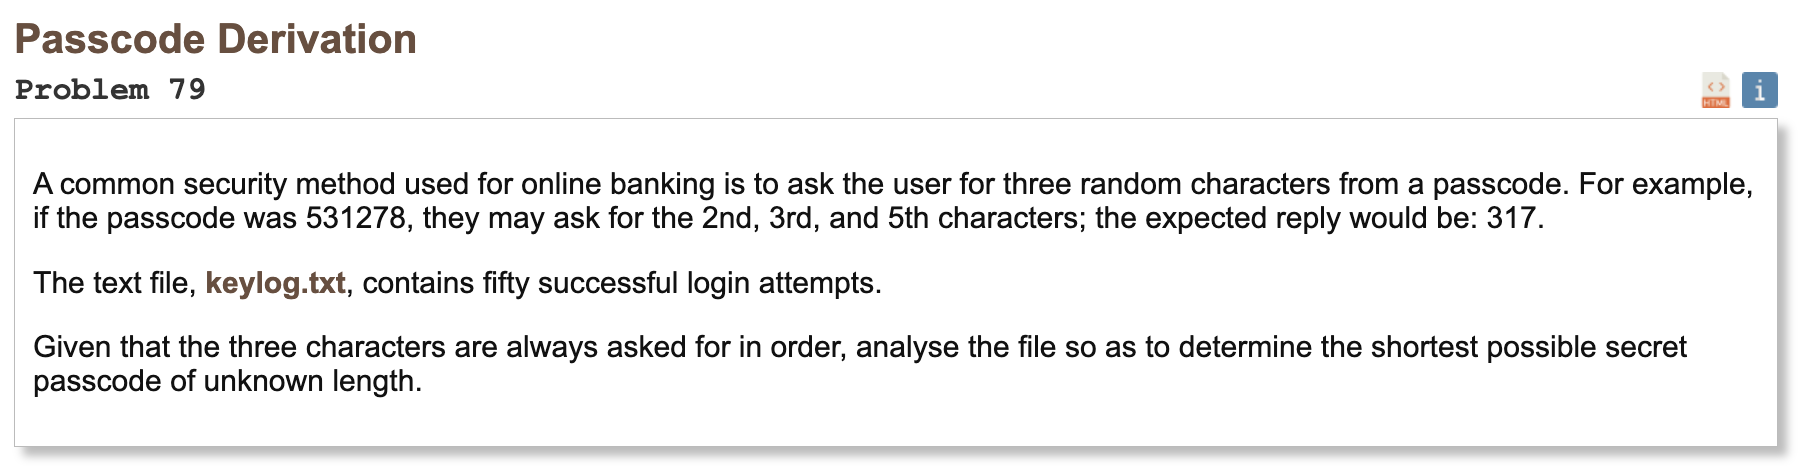

## Initial approach

* each line in the txt file is a successful login attempt
* each login attempt tells us the order of 3 digits
* target is to find the shortest passcode that fits all rules.

* defaultdict: it's like a normal dict but it gives a default value if the key is missing, so you don't get error.  
* deque means "double-ended queue". you can add or remove items from both ends.

Now:

* read all login attempts and find the order between digits
* built a graph to show which digit must come before another
* use a queue to find the correct digit order step by step

In [1]:
from collections import defaultdict, deque

with open("0079_keylog.txt") as f:
    attempts = set(line.strip() for line in f if line.strip())

graph = defaultdict(list)
in_degree = defaultdict(int)

for code in attempts:
    for digit in code:
        if digit not in graph:
            graph[digit] = []
        if digit not in in_degree:
            in_degree[digit] = 0

    if code[1] not in graph[code[0]]:
        graph[code[0]].append(code[1])
        in_degree[code[1]] += 1

    if code[2] not in graph[code[1]]:
        graph[code[1]].append(code[2])
        in_degree[code[2]] += 1

queue = deque(sorted([node for node in in_degree if in_degree[node] == 0]))
result = []

while queue:
    current = queue.popleft()
    result.append(current)
    for neighbor in sorted(graph[current]):
        in_degree[neighbor] -= 1
        if in_degree[neighbor] == 0 and neighbor not in queue:
            queue.append(neighbor)
    queue = deque(sorted(queue))

print("".join(result))

73162890
